In [402]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [403]:
!pwd

/Users/satvikahuja13/makemore/makemore2


In [404]:
words = open("/Users/satvikahuja13/makemore/names.txt", "r").read().splitlines()

In [405]:
len(words)

32033

In [406]:
# build vocab of ch and mapping to/from int
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [407]:
#build the dataset

block_size = 3
X, Y = [], []
for w in words:
    # print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [408]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

Sample structure (not real)

In [409]:
C = torch.randn((27,2))

In [410]:
C[5]

tensor([-0.2906,  1.2101])

In [411]:
#one more way which we did before lecture
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.2906,  1.2101])

In [412]:
C[X]

tensor([[[ 0.6793, -1.3077],
         [ 0.6793, -1.3077],
         [ 0.6793, -1.3077]],

        [[ 0.6793, -1.3077],
         [ 0.6793, -1.3077],
         [-0.2906,  1.2101]],

        [[ 0.6793, -1.3077],
         [-0.2906,  1.2101],
         [-0.7512,  0.8682]],

        ...,

        [[-1.1198,  1.2818],
         [-1.1198,  1.2818],
         [ 1.8590,  1.0221]],

        [[-1.1198,  1.2818],
         [ 1.8590,  1.0221],
         [-1.1198,  1.2818]],

        [[ 1.8590,  1.0221],
         [-1.1198,  1.2818],
         [-0.6335,  1.1837]]])

In [413]:
C[X].shape

torch.Size([228146, 3, 2])

In [414]:
X[10,0] * C

tensor([[  6.1140, -11.7690],
        [ -5.8141,   9.3783],
        [  0.6405,  -5.5365],
        [-12.7994,   7.3155],
        [ 16.8347,  -1.6037],
        [ -2.6158,  10.8907],
        [  3.9049, -12.6618],
        [ 12.9527,  -1.5378],
        [ 11.1623,  -3.1400],
        [ -0.1291,  -8.6046],
        [-22.2236,  -8.8614],
        [ 10.7648,  -4.2332],
        [  5.4777,  -8.4224],
        [ -6.7604,   7.8136],
        [ -5.2064,  -5.2154],
        [  3.6561,  -0.6345],
        [  4.7702,  -4.3172],
        [  3.5746, -14.3168],
        [  2.5063,   9.6563],
        [-11.1869,   7.3350],
        [ -5.6495,  18.6282],
        [-16.8891,   0.6062],
        [ 13.8788,   1.2016],
        [ -2.3927,  -2.5559],
        [ -5.7015,  10.6531],
        [ 16.7311,   9.1989],
        [-10.0778,  11.5361]])

In [415]:
X[10,1]

tensor(22)

In [416]:
C

tensor([[ 0.6793, -1.3077],
        [-0.6460,  1.0420],
        [ 0.0712, -0.6152],
        [-1.4222,  0.8128],
        [ 1.8705, -0.1782],
        [-0.2906,  1.2101],
        [ 0.4339, -1.4069],
        [ 1.4392, -0.1709],
        [ 1.2403, -0.3489],
        [-0.0143, -0.9561],
        [-2.4693, -0.9846],
        [ 1.1961, -0.4704],
        [ 0.6086, -0.9358],
        [-0.7512,  0.8682],
        [-0.5785, -0.5795],
        [ 0.4062, -0.0705],
        [ 0.5300, -0.4797],
        [ 0.3972, -1.5908],
        [ 0.2785,  1.0729],
        [-1.2430,  0.8150],
        [-0.6277,  2.0698],
        [-1.8766,  0.0674],
        [ 1.5421,  0.1335],
        [-0.2659, -0.2840],
        [-0.6335,  1.1837],
        [ 1.8590,  1.0221],
        [-1.1198,  1.2818]])

In [417]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [418]:
index = X[10,1]
one_hot = F.one_hot(index, num_classes = 27).float()
one_hot

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [419]:
one_hot @ C

tensor([1.5421, 0.1335])

In [420]:
C[X][10,1]

tensor([1.5421, 0.1335])

In [421]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [422]:
C.shape

torch.Size([27, 2])

## Args
C-embedding

X-input letters(3 letters)

Y-prediction letter(1 letter)

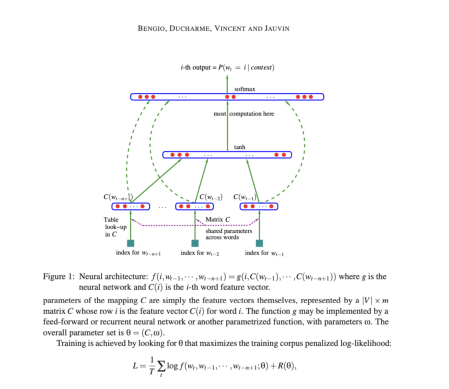

In [423]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'arch.png'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  
plt.show()

In [424]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
emb = C[X]
print(emb.shape, W1.shape)

torch.Size([228146, 3, 2]) torch.Size([6, 100])


In [425]:
h = emb.view(-1, 6) @ W1 + b1
# not working as emb is 32x3x2 it needs to be 32x6 to multiply

In [426]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]],1).shape

torch.Size([228146, 6])

In [427]:
#another better method of pytorch
# len(torch.unbind(emb, 1)) #splits in the dimension 1
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [428]:
#better and more efficient way to concatenate

In [429]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [430]:
a.shape

torch.Size([18])

In [431]:
a.view(3,3,2) # THE VIEW METHOD IS EXTREMELY EFFICIENT

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [432]:
a.storage() #when we call .view we are manipulating the attributes of the tensor that dictate how the 1d sequence is interpreted to be ndim tensor, its better and also doesnt create new memory

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [433]:
h = emb.view(32,6) @ W1 +b1

RuntimeError: shape '[32, 6]' is invalid for input of size 1368876

In [434]:
h

tensor([[ 1.2867,  5.1419,  7.0375,  ...,  2.7602, -2.7091, -3.5899],
        [-2.2587,  0.5910,  4.5189,  ..., -0.0961, -1.4928, -1.9384],
        [-0.0275,  2.3584,  1.6060,  ..., -0.9698,  1.3593, -0.1787],
        ...,
        [-0.2617, -1.8340, -3.8588,  ...,  3.7963, -0.7261, -0.3497],
        [-5.7807,  1.5920, -4.6301,  ..., -1.0874,  2.6867,  3.2224],
        [-1.4150, -3.2121, -2.5478,  ..., -5.8633,  0.2087,  4.0342]])

In [435]:
h.shape

torch.Size([228146, 100])

In [436]:
#You can also use -1 which inferes what it should be
h = torch.tanh(emb.view(-1,6) @ W1 +b1)

In [437]:
h.shape

torch.Size([228146, 100])

In [438]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)

In [439]:
logits = h @ W2 + b2

In [440]:
logits.shape

torch.Size([228146, 27])

In [441]:
counts = logits.exp()

In [442]:
prob = counts/counts.sum(1, keepdims=True)

In [443]:
prob.shape

torch.Size([228146, 27])

In [444]:
prob

tensor([[5.8354e-15, 2.1144e-08, 2.2014e-08,  ..., 9.6557e-16, 1.2204e-04,
         2.6889e-09],
        [6.8781e-14, 2.1134e-06, 6.4509e-02,  ..., 2.0532e-14, 1.3663e-04,
         6.4074e-03],
        [2.4125e-16, 2.5919e-08, 1.2285e-13,  ..., 7.1676e-05, 1.3580e-07,
         9.9993e-01],
        ...,
        [3.4178e-06, 3.2689e-07, 7.3075e-16,  ..., 1.4353e-05, 4.1641e-10,
         5.7532e-11],
        [9.1230e-01, 4.6480e-10, 4.0228e-12,  ..., 1.8725e-02, 1.0117e-13,
         2.3292e-03],
        [2.8247e-06, 6.1094e-03, 2.4871e-17,  ..., 7.6373e-05, 2.1656e-17,
         9.9375e-01]])

In [445]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [446]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [447]:
# to find out correct probability prediction val which means if p is high then it has correctly predicted
prob[torch.arange(32), Y]

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [448]:
# Find loss
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [520]:
# train(for training parameters), val(for training hyperparameters), test split(for evaluating performance of the model) for getting better loss
# 80, 10, 10%


In [460]:
#build the dataset
def build_dataset(words):
    block_size = 4
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0]*block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [477]:
Xtr.shape, Ytr.shape, #dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [609]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 20), generator=g)
W1 = torch.randn((60, 300), generator = g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [610]:
sum(p.nelement() for p in parameters) # number of parameters in total

26967

In [611]:
for p in parameters:
    p.requires_grad = True
torch.device("mps")

device(type='mps')

In [612]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre


In [613]:
lri = []
lossi = []
stepi = []

In [632]:
# Training
for i in range(250000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    # lr = lrs[i]
    lr = 0.005 if i < 10000 else (0.001 if i < 100000 and i >= 10000 else (0.0005 if i >= 100000 and i < 150000 else 0.0001))
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    
print(loss.item())

1.7942732572555542


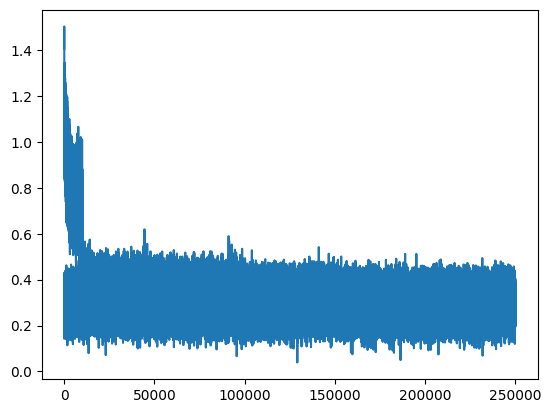

In [633]:
plt.plot(stepi, lossi)

In [634]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0234, grad_fn=<NllLossBackward0>)

In [635]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1178, grad_fn=<NllLossBackward0>)

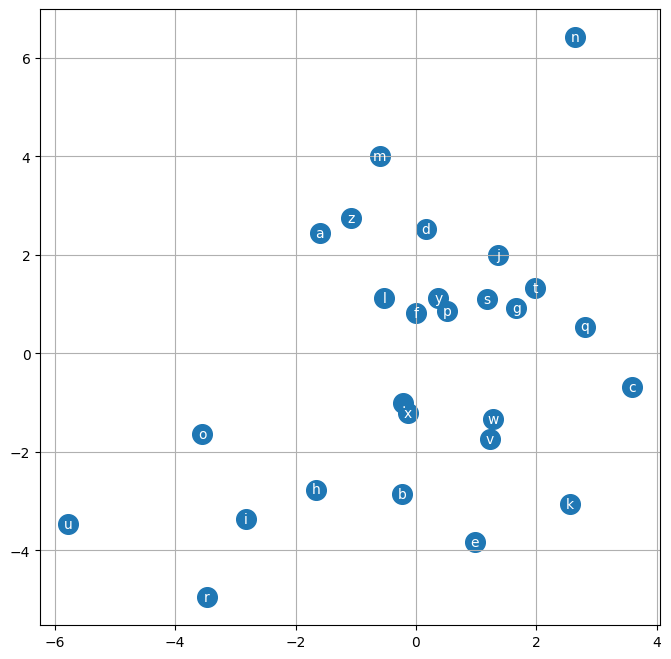

In [636]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [637]:
# sample from model (inf)
g = torch.Generator().manual_seed(214748347 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

eminie.
luna.
cintinsish.
griphaliqazer.
chadsha.
man.
katsy.
josha.
samira.
keon.
jenszenishna.
moladlanciel.
hea.
emelleu.
rai.
javy.
kaxpireilah.
cyrian.
hart.
elle.
